# Long Short-Term Memory (LSTM)

## What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

worth watching: https://www.youtube.com/watch?v=b61DPVFX03I&t=329s

## Our LSTM Implementation:

Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.lstm as lstm
import src.test_bench as bench

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 768
[TEST BENCH] Amount of test data is 191
[TEST BENCH] Making an instance of the class we want to test
[LSTM] padding = -10
[LSTM] batch_size = 64
[LSTM] num_epochs = 20
[LSTM] learning_rate = 0.001
[LSTM] criterion = MSELoss()
[TEST BENCH] Starting training loop
[LSTM] model = LSTMPredictor(
  (model): Sequential(
    (0): LSTM(1, 257, num_layers=2, batch_first=True, dropout=0.1)
    (1): ExtractTensorAfterLSTM()
    (2): Linear(in_features=257, out_features=257, bias=True)
    (3): Linear(in_features=257, out_features=257, bias=True)
  )
)
[LSTM] optimizer = Adam (
P

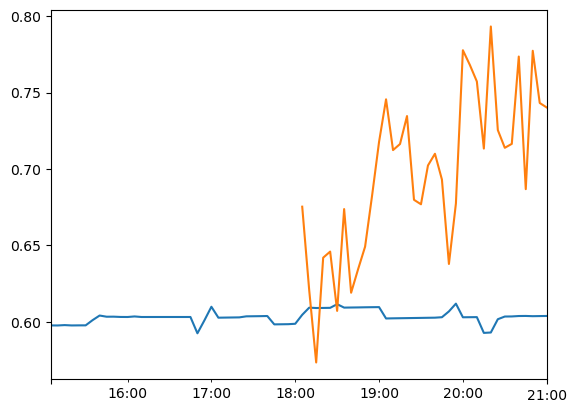

[LSTM] MSE of this prediction is: 0.011711481503590103
[LSTM] ************************ Average loss for the batches in the epoch: 0.9196050639405395
[LSTM] Epoch 2 / 20. Last epoch time was 27.993606328964233
[LSTM] Plotting prediction for some random sample in the test set.


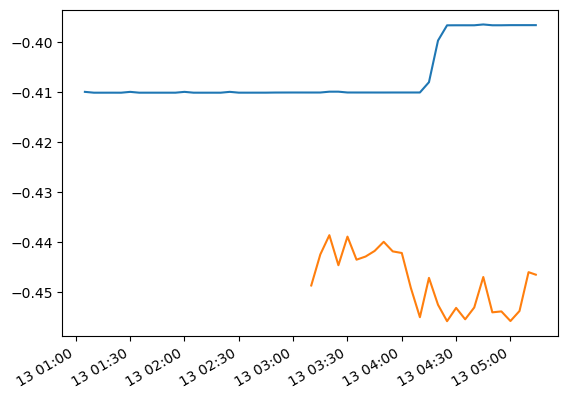

[LSTM] MSE of this prediction is: 0.002060766078817946
[LSTM] ************************ Average loss for the batches in the epoch: 0.02267205055192762
[LSTM] Epoch 3 / 20. Last epoch time was 27.250802993774414
[LSTM] Plotting prediction for some random sample in the test set.


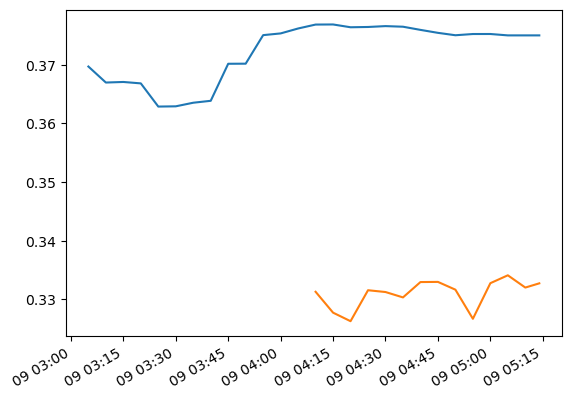

[LSTM] MSE of this prediction is: 0.0020145230487380694
[LSTM] ************************ Average loss for the batches in the epoch: 0.00771418867145919
[LSTM] Epoch 4 / 20. Last epoch time was 28.034148693084717
[LSTM] Plotting prediction for some random sample in the test set.


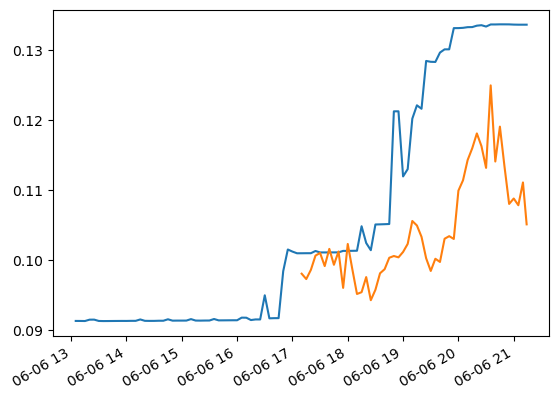

[LSTM] MSE of this prediction is: 0.0003011411413768526
[LSTM] ************************ Average loss for the batches in the epoch: 0.007597726928140742
[LSTM] Epoch 5 / 20. Last epoch time was 28.064064264297485
[LSTM] Plotting prediction for some random sample in the test set.


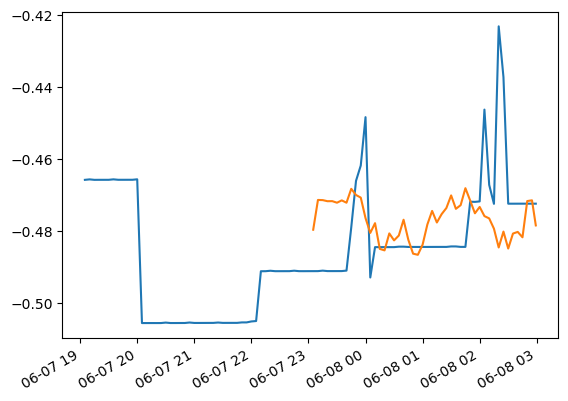

[LSTM] MSE of this prediction is: 0.00025383090460481843
[LSTM] ************************ Average loss for the batches in the epoch: 0.0076245891526482545
[LSTM] Epoch 6 / 20. Last epoch time was 28.74005103111267
[LSTM] Plotting prediction for some random sample in the test set.


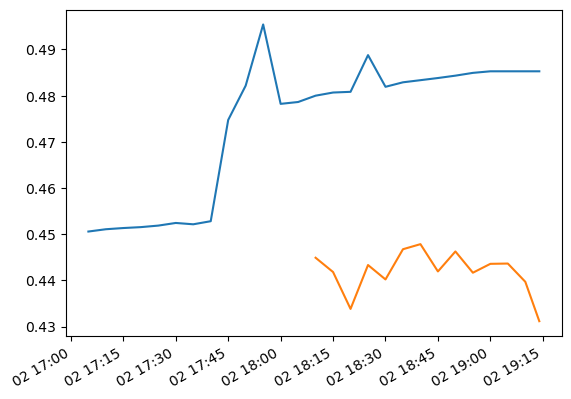

[LSTM] MSE of this prediction is: 0.001777061489794754
[LSTM] ************************ Average loss for the batches in the epoch: 0.007552211303228625
[LSTM] Epoch 7 / 20. Last epoch time was 27.856287717819214
[LSTM] Plotting prediction for some random sample in the test set.


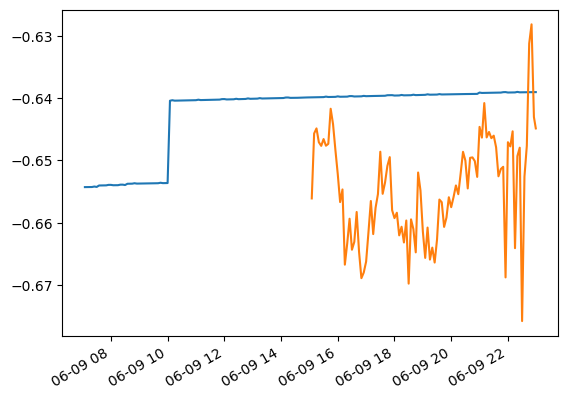

[LSTM] MSE of this prediction is: 0.00029890885114544716
[LSTM] ************************ Average loss for the batches in the epoch: 0.007425782087463603
[LSTM] Epoch 8 / 20. Last epoch time was 27.83201551437378
[LSTM] Plotting prediction for some random sample in the test set.


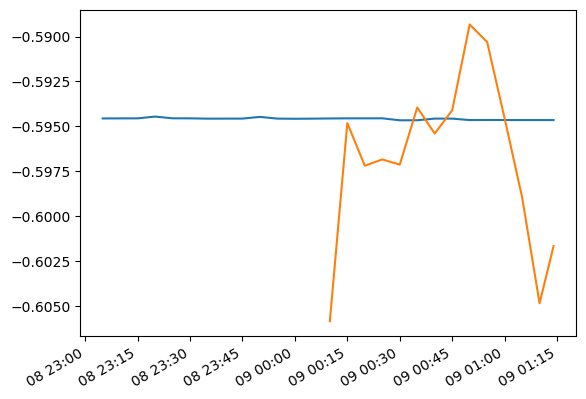

[LSTM] MSE of this prediction is: 2.6060496069608197e-05
[LSTM] ************************ Average loss for the batches in the epoch: 0.0073102311578678025
[LSTM] Epoch 9 / 20. Last epoch time was 27.747631311416626
[LSTM] Plotting prediction for some random sample in the test set.


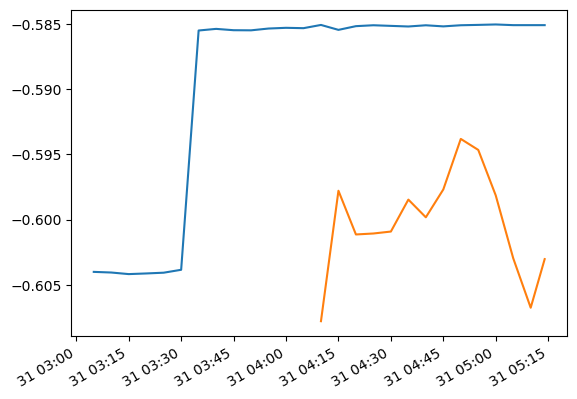

[LSTM] MSE of this prediction is: 0.0002443590237491111
[LSTM] ************************ Average loss for the batches in the epoch: 0.007068994631602739
[LSTM] Epoch 10 / 20. Last epoch time was 27.577731132507324
[LSTM] Plotting prediction for some random sample in the test set.


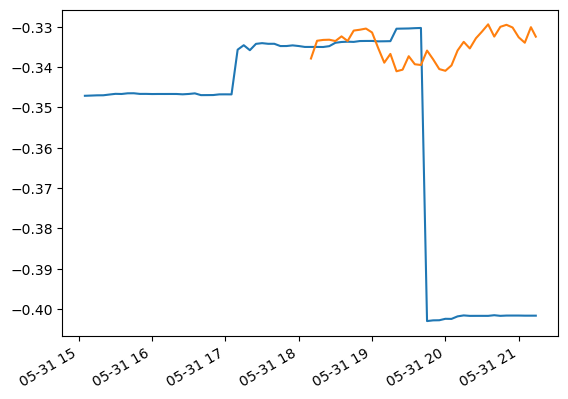

[LSTM] MSE of this prediction is: 0.0023301670952613714
[LSTM] ************************ Average loss for the batches in the epoch: 0.007111083161064678
[LSTM] Epoch 11 / 20. Last epoch time was 27.63970184326172
[LSTM] Plotting prediction for some random sample in the test set.


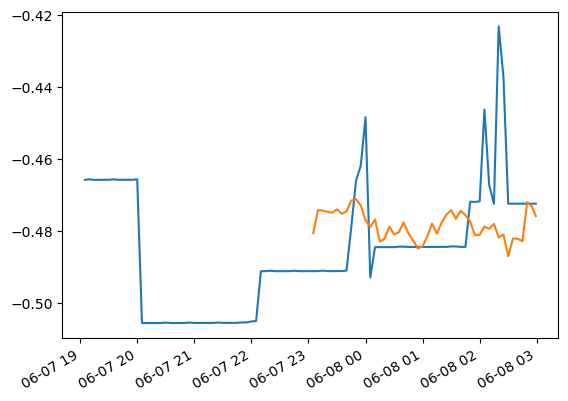

[LSTM] MSE of this prediction is: 0.00023482853416507258
[LSTM] ************************ Average loss for the batches in the epoch: 0.006930859015097447
[LSTM] Epoch 12 / 20. Last epoch time was 28.68617296218872
[LSTM] Plotting prediction for some random sample in the test set.


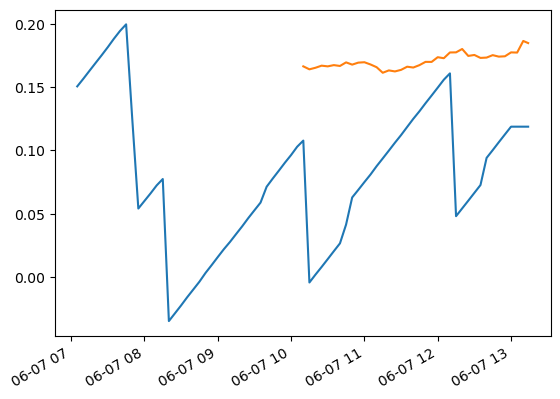

[LSTM] MSE of this prediction is: 0.008883442246261482
[LSTM] ************************ Average loss for the batches in the epoch: 0.00681501092992469
[LSTM] Epoch 13 / 20. Last epoch time was 27.740593671798706
[LSTM] Plotting prediction for some random sample in the test set.


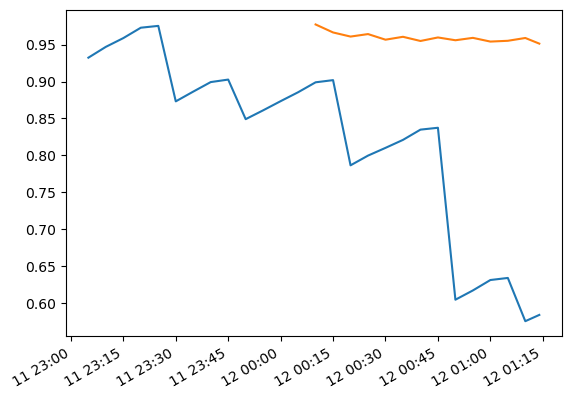

[LSTM] MSE of this prediction is: 0.06200597601332529
[LSTM] ************************ Average loss for the batches in the epoch: 0.006830562901273934
[LSTM] Epoch 14 / 20. Last epoch time was 27.961288452148438
[LSTM] Plotting prediction for some random sample in the test set.


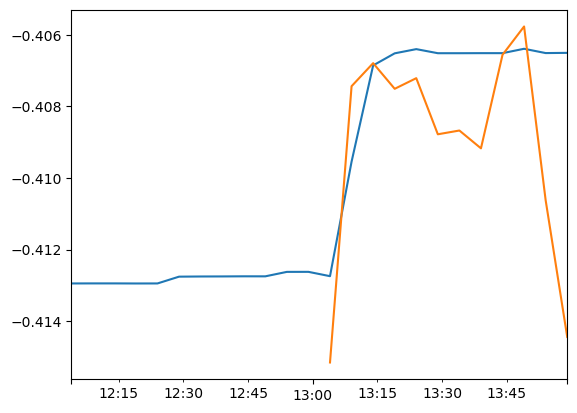

[LSTM] MSE of this prediction is: 9.07423853041745e-06
[LSTM] ************************ Average loss for the batches in the epoch: 0.006683427446070268
[LSTM] Epoch 15 / 20. Last epoch time was 27.66014337539673
[LSTM] Plotting prediction for some random sample in the test set.


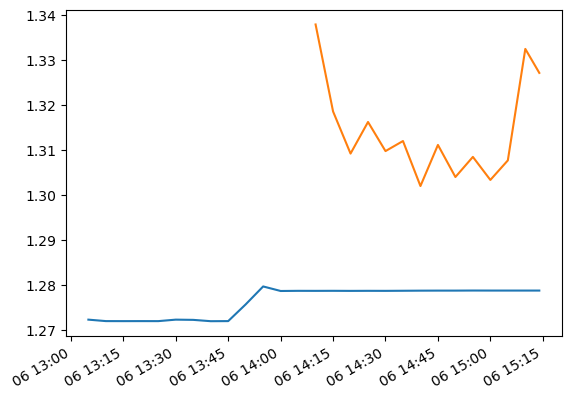

[LSTM] MSE of this prediction is: 0.0013803934018458057
[LSTM] ************************ Average loss for the batches in the epoch: 0.006501076251769326
[LSTM] Epoch 16 / 20. Last epoch time was 28.068496704101562
[LSTM] Plotting prediction for some random sample in the test set.


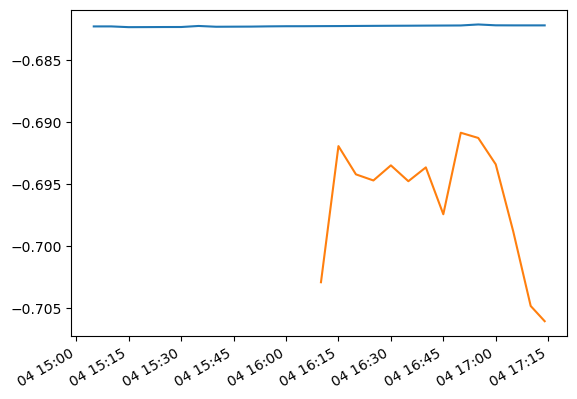

[LSTM] MSE of this prediction is: 0.00022199652965277194
[LSTM] ************************ Average loss for the batches in the epoch: 0.0062995306283207325
[LSTM] Epoch 17 / 20. Last epoch time was 27.142191648483276
[LSTM] Plotting prediction for some random sample in the test set.


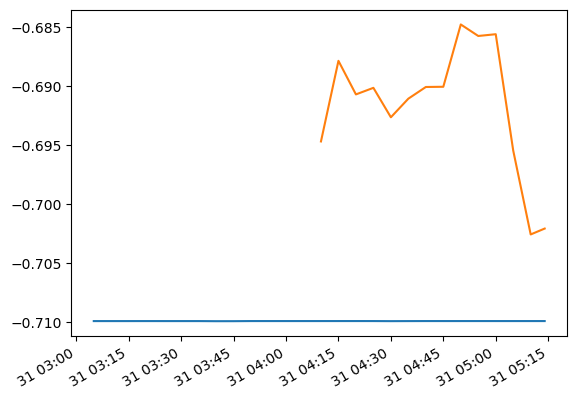

[LSTM] MSE of this prediction is: 0.0003624595221000357
[LSTM] ************************ Average loss for the batches in the epoch: 0.006418758877870542
[LSTM] Epoch 18 / 20. Last epoch time was 27.62873387336731
[LSTM] Plotting prediction for some random sample in the test set.


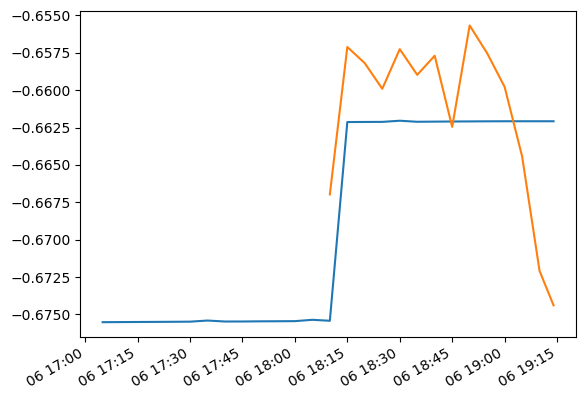

[LSTM] MSE of this prediction is: 3.5297451636066095e-05
[LSTM] ************************ Average loss for the batches in the epoch: 0.0060864329555029555
[LSTM] Epoch 19 / 20. Last epoch time was 28.90338659286499
[LSTM] Plotting prediction for some random sample in the test set.


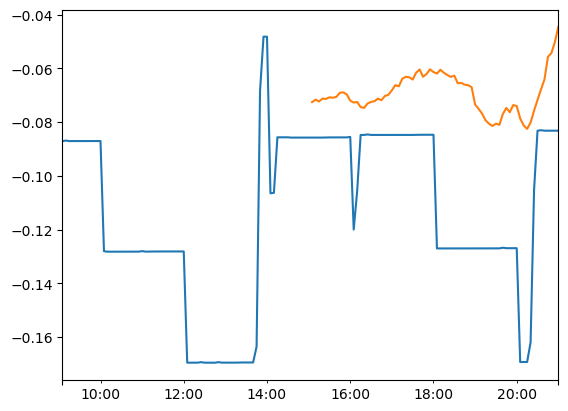

[LSTM] MSE of this prediction is: 0.0017429976181065968
[LSTM] ************************ Average loss for the batches in the epoch: 0.005880948673813801
[LSTM] Epoch 20 / 20. Last epoch time was 28.3665292263031
[LSTM] Plotting prediction for some random sample in the test set.


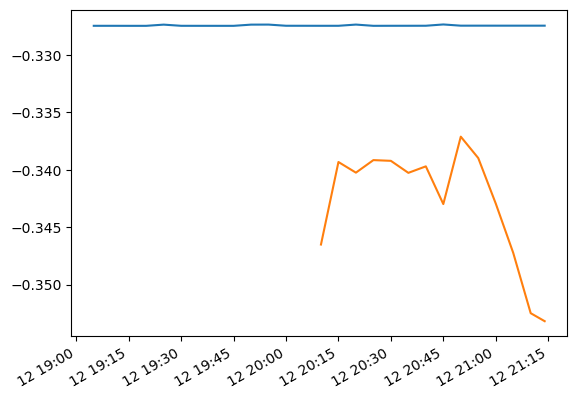

[LSTM] MSE of this prediction is: 0.0002604285018845504
[LSTM] ************************ Average loss for the batches in the epoch: 0.005868736132062182
[TEST BENCH] Training took 564.3644256591797 seconds.
[TEST BENCH] Starting testing loop


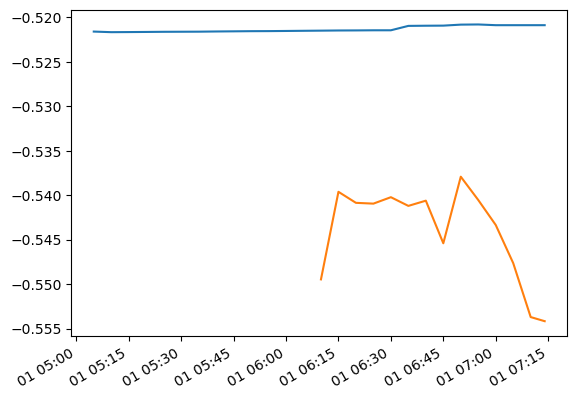

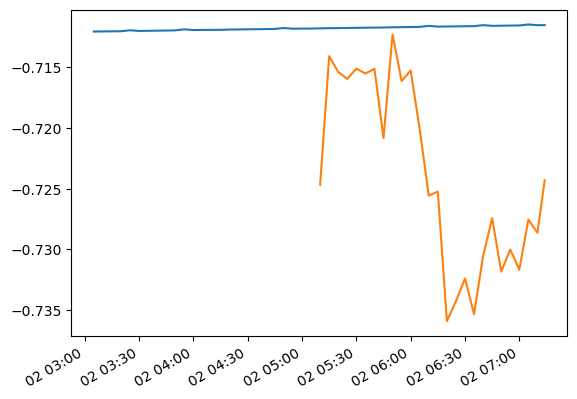

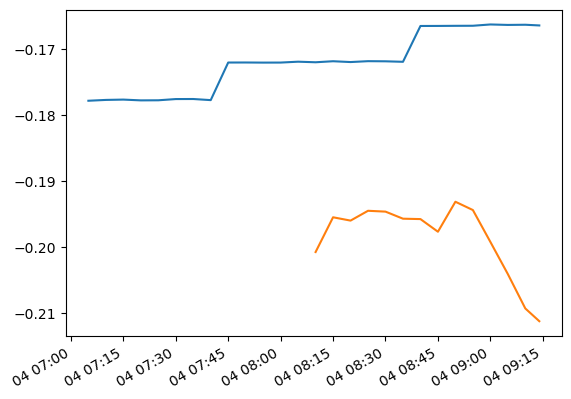

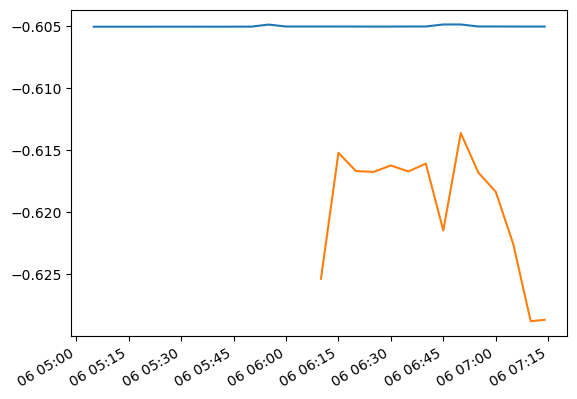

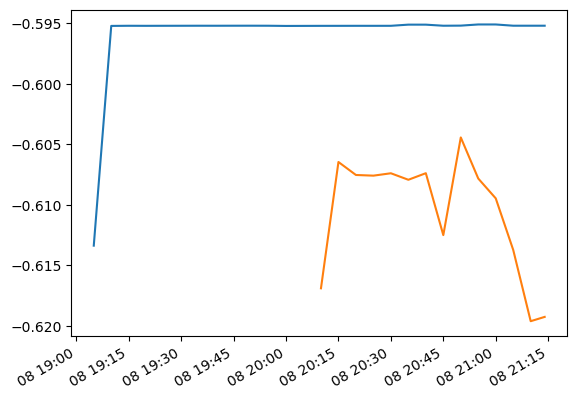

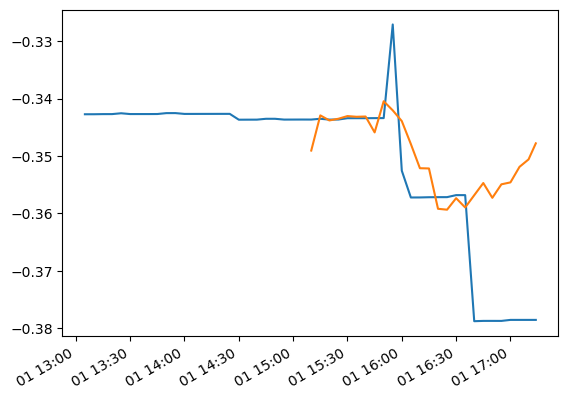

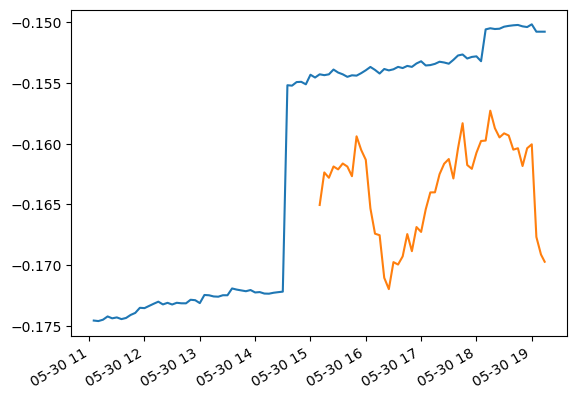

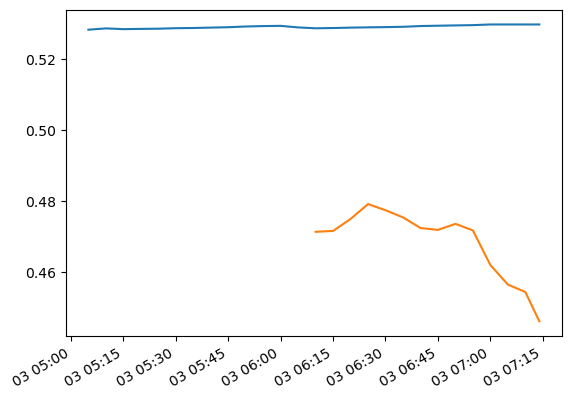

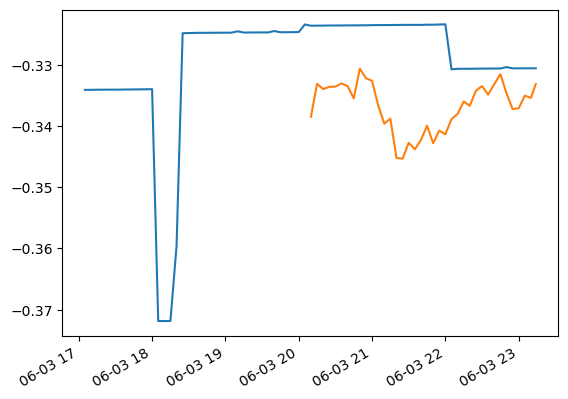

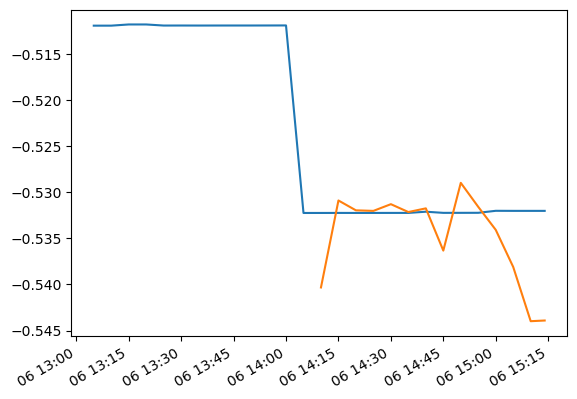

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             564.3644256591797
[TEST BENCH] Average mse over the test set is        0.09859770487604941
[TEST BENCH] Average precision over the test set is  0.7384047193446083
[TEST BENCH] Average recall over the test set is     0.41236654016795454
[TEST BENCH] Average F1 over the test set is         0.5167893416244088
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Spl

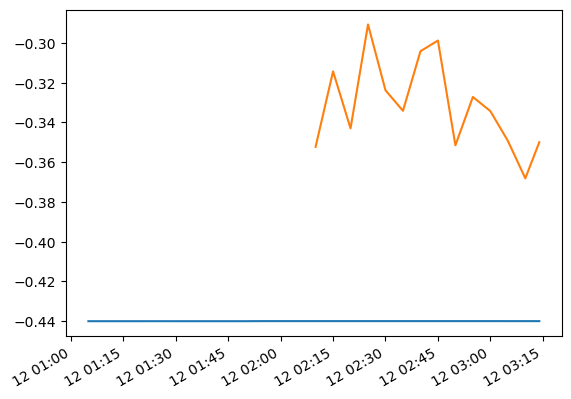

[LSTM] MSE of this prediction is: 0.012240538645022812
[LSTM] ************************ Average loss for the batches in the epoch: 0.5059281081046866
[LSTM] Epoch 2 / 20. Last epoch time was 3.205118417739868
[LSTM] Plotting prediction for some random sample in the test set.


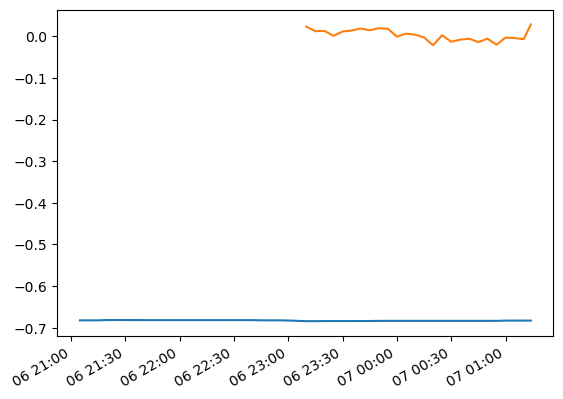

[LSTM] MSE of this prediction is: 0.4721278572300163
[LSTM] ************************ Average loss for the batches in the epoch: 0.48950942280306214
[LSTM] Epoch 3 / 20. Last epoch time was 3.06805419921875
[LSTM] Plotting prediction for some random sample in the test set.


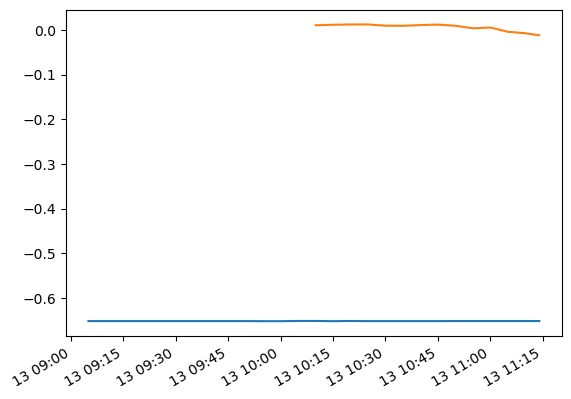

[LSTM] MSE of this prediction is: 0.4327978948539424
[LSTM] ************************ Average loss for the batches in the epoch: 0.8218383119366635
[LSTM] Epoch 4 / 20. Last epoch time was 3.07633900642395
[LSTM] Plotting prediction for some random sample in the test set.


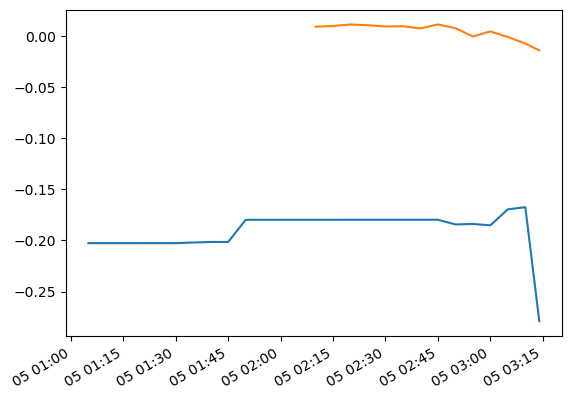

[LSTM] MSE of this prediction is: 0.03704422836567367
[LSTM] ************************ Average loss for the batches in the epoch: 0.8213968335211962
[LSTM] Epoch 5 / 20. Last epoch time was 3.195704698562622
[LSTM] Plotting prediction for some random sample in the test set.


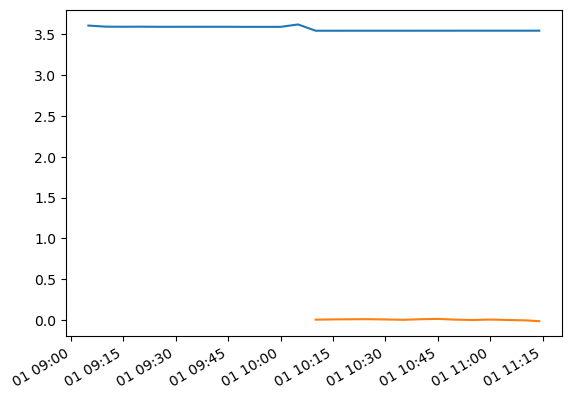

[LSTM] MSE of this prediction is: 12.522922645453438
[LSTM] ************************ Average loss for the batches in the epoch: 0.8212977875580733
[LSTM] Epoch 6 / 20. Last epoch time was 3.4598538875579834
[LSTM] Plotting prediction for some random sample in the test set.


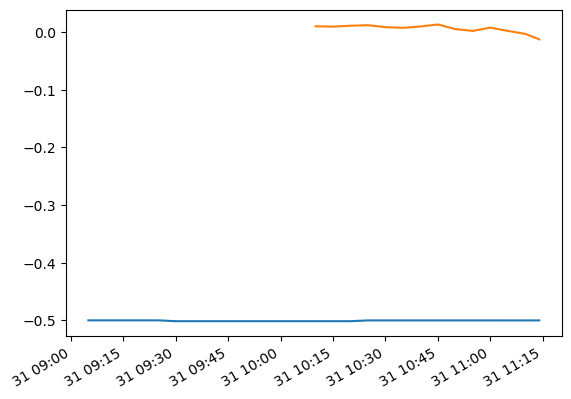

[LSTM] MSE of this prediction is: 0.2564383046033546
[LSTM] ************************ Average loss for the batches in the epoch: 0.8212041827453964
[LSTM] Epoch 7 / 20. Last epoch time was 3.213557243347168
[LSTM] Plotting prediction for some random sample in the test set.


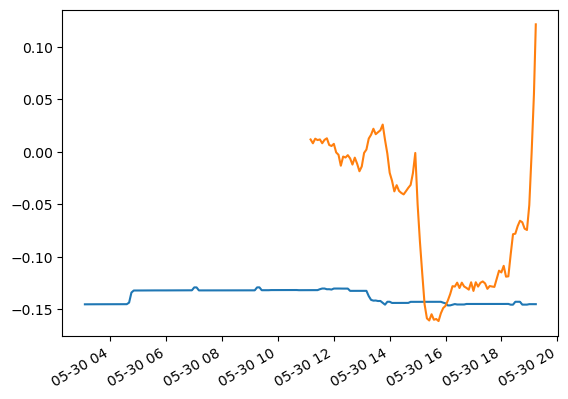

[LSTM] MSE of this prediction is: 0.010423671666735005
[LSTM] ************************ Average loss for the batches in the epoch: 0.8212021378607586
[LSTM] Epoch 8 / 20. Last epoch time was 3.2016844749450684
[LSTM] Plotting prediction for some random sample in the test set.


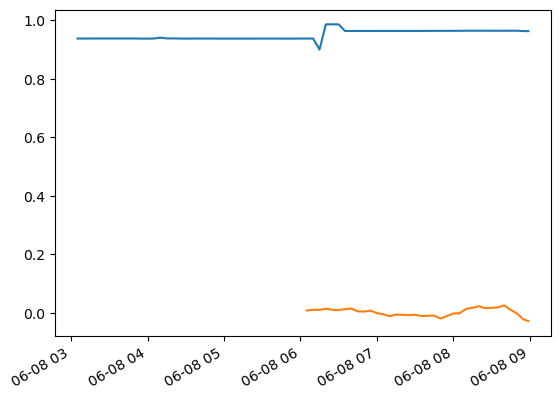

[LSTM] MSE of this prediction is: 0.9202512957133935
[LSTM] ************************ Average loss for the batches in the epoch: 0.8211628395593029
[LSTM] Epoch 9 / 20. Last epoch time was 3.1815669536590576
[LSTM] Plotting prediction for some random sample in the test set.


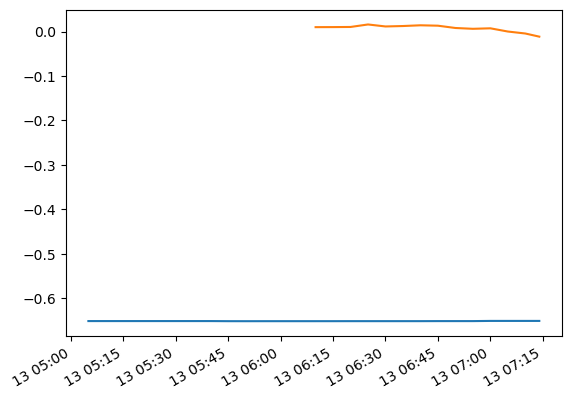

[LSTM] MSE of this prediction is: 0.4343227179094744
[LSTM] ************************ Average loss for the batches in the epoch: 0.8211312828392818
[LSTM] Epoch 10 / 20. Last epoch time was 3.2241246700286865
[LSTM] Plotting prediction for some random sample in the test set.


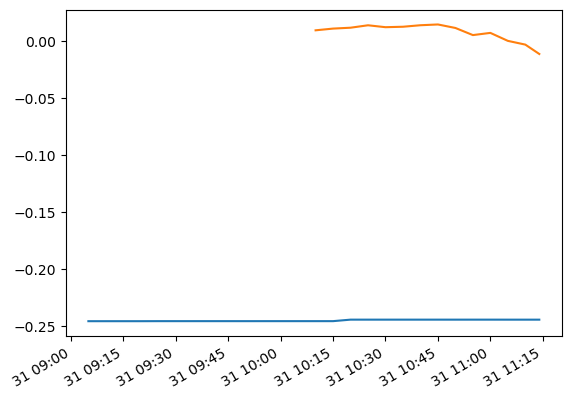

[LSTM] MSE of this prediction is: 0.06350952142151854
[LSTM] ************************ Average loss for the batches in the epoch: 0.8211203858085062
[LSTM] Epoch 11 / 20. Last epoch time was 3.2142369747161865
[LSTM] Plotting prediction for some random sample in the test set.


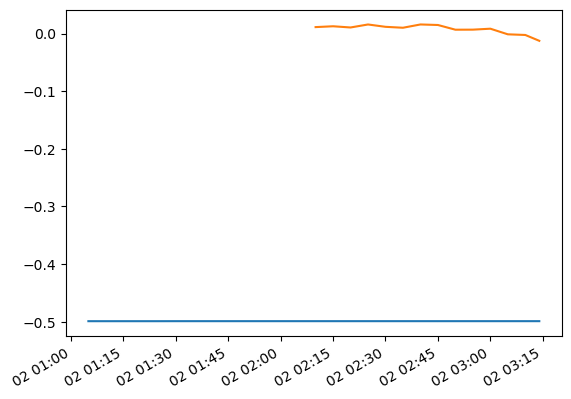

[LSTM] MSE of this prediction is: 0.2569118098520294
[LSTM] ************************ Average loss for the batches in the epoch: 0.8211080695705852
[LSTM] Epoch 12 / 20. Last epoch time was 3.2356302738189697
[LSTM] Plotting prediction for some random sample in the test set.


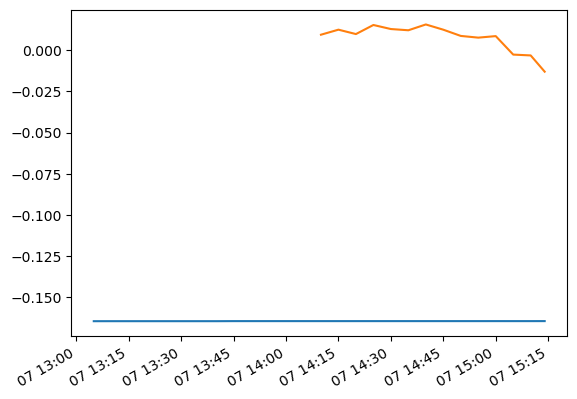

[LSTM] MSE of this prediction is: 0.029638203766371714
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210941248241512
[LSTM] Epoch 13 / 20. Last epoch time was 3.366014242172241
[LSTM] Plotting prediction for some random sample in the test set.


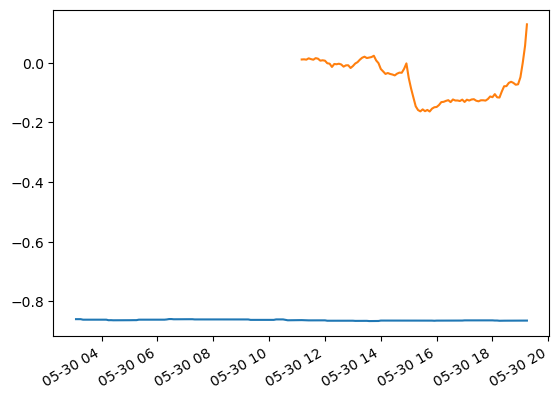

[LSTM] MSE of this prediction is: 0.6534467414274441
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210791053100565
[LSTM] Epoch 14 / 20. Last epoch time was 3.3559610843658447
[LSTM] Plotting prediction for some random sample in the test set.


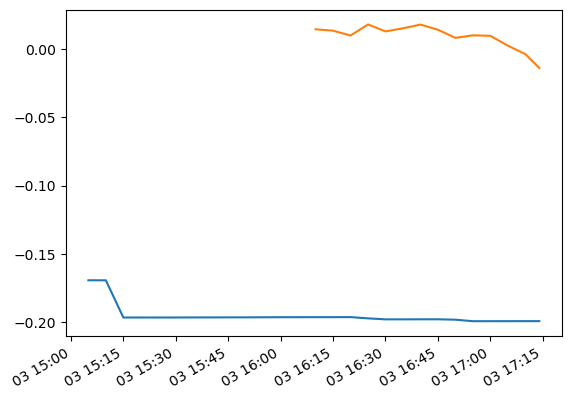

[LSTM] MSE of this prediction is: 0.04306637881552582
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210665366087837
[LSTM] Epoch 15 / 20. Last epoch time was 3.309605360031128
[LSTM] Plotting prediction for some random sample in the test set.


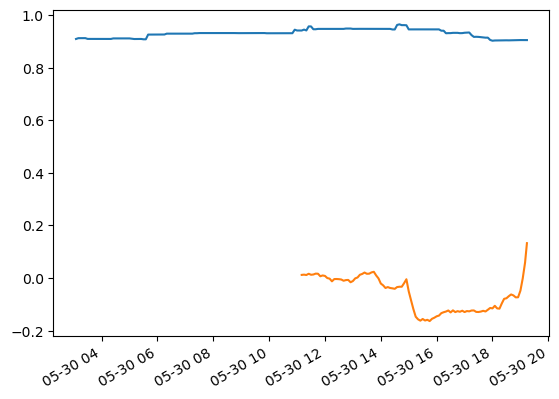

[LSTM] MSE of this prediction is: 0.9950290502007648
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210548498164648
[LSTM] Epoch 16 / 20. Last epoch time was 3.183387517929077
[LSTM] Plotting prediction for some random sample in the test set.


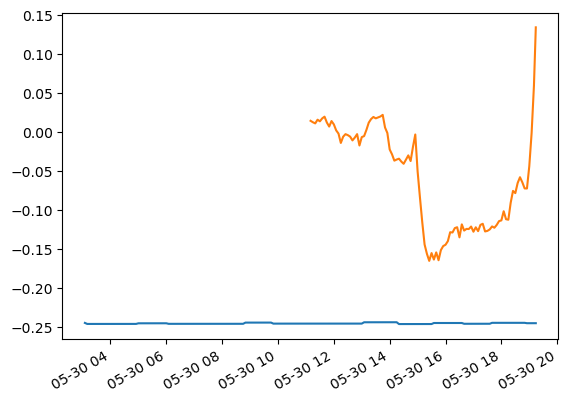

[LSTM] MSE of this prediction is: 0.03932633456402263
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210416850687443
[LSTM] Epoch 17 / 20. Last epoch time was 3.2315776348114014
[LSTM] Plotting prediction for some random sample in the test set.


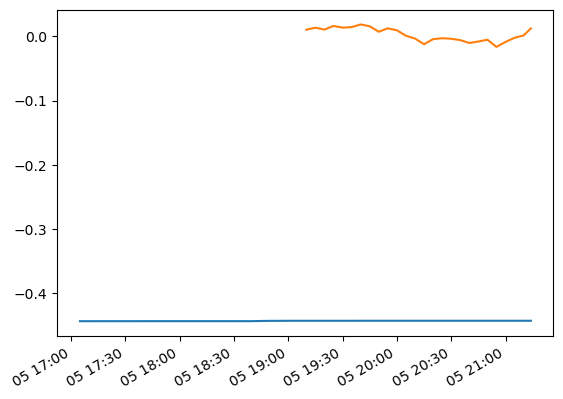

[LSTM] MSE of this prediction is: 0.19890830288920605
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210248299713793
[LSTM] Epoch 18 / 20. Last epoch time was 3.3460404872894287
[LSTM] Plotting prediction for some random sample in the test set.


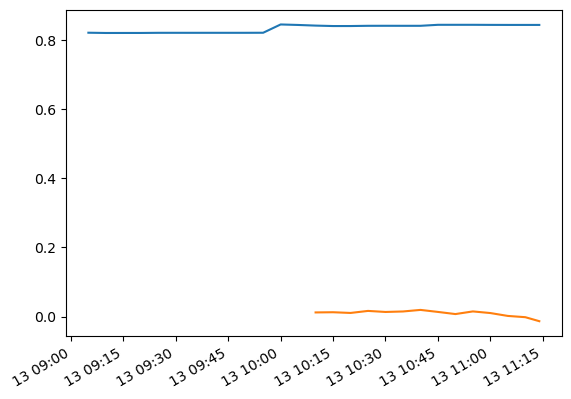

[LSTM] MSE of this prediction is: 0.6948623738748854
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210082235692562
[LSTM] Epoch 19 / 20. Last epoch time was 3.1627211570739746
[LSTM] Plotting prediction for some random sample in the test set.


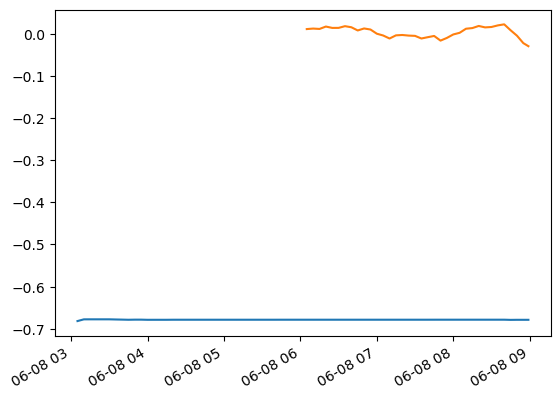

[LSTM] MSE of this prediction is: 0.4662682426260323
[LSTM] ************************ Average loss for the batches in the epoch: 0.8210174802733564
[LSTM] Epoch 20 / 20. Last epoch time was 3.0832245349884033
[LSTM] Plotting prediction for some random sample in the test set.


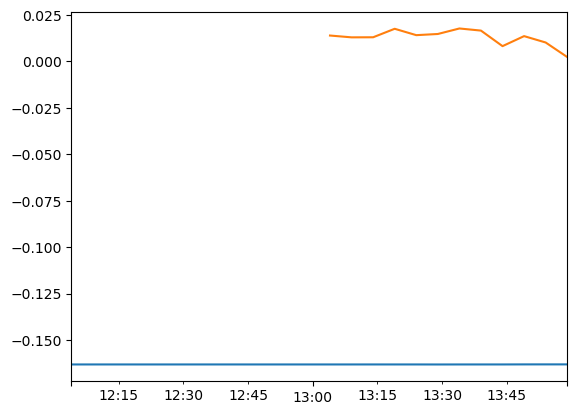

[LSTM] MSE of this prediction is: 0.031052613951625393
[LSTM] ************************ Average loss for the batches in the epoch: 0.8209870920099062
[TEST BENCH] Training took 64.82906174659729 seconds.
[TEST BENCH] Starting testing loop


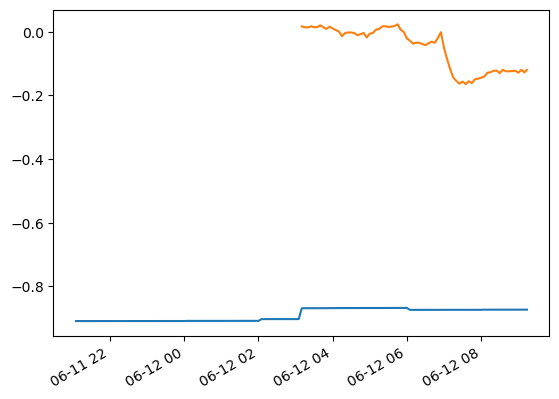

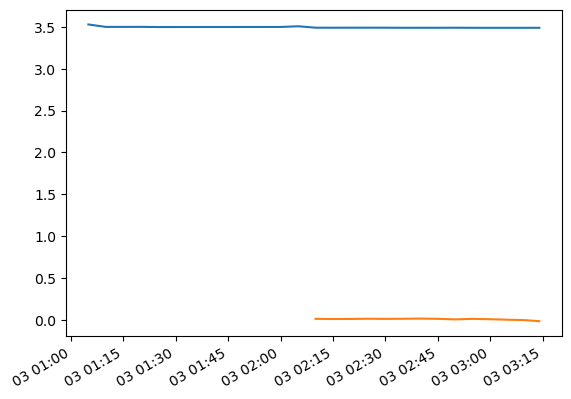

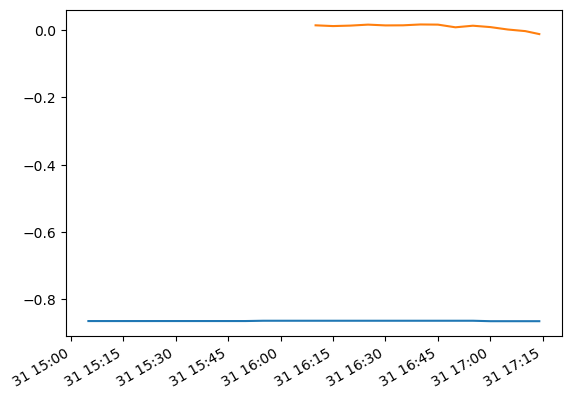

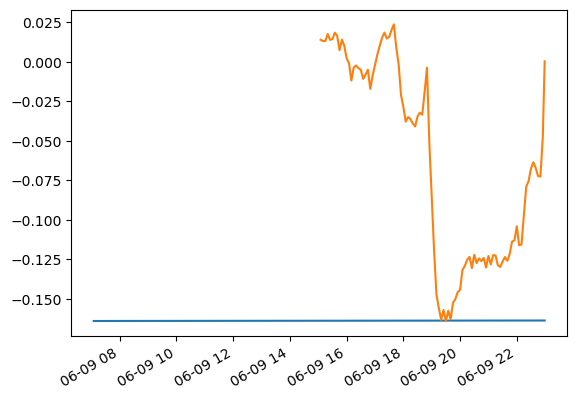

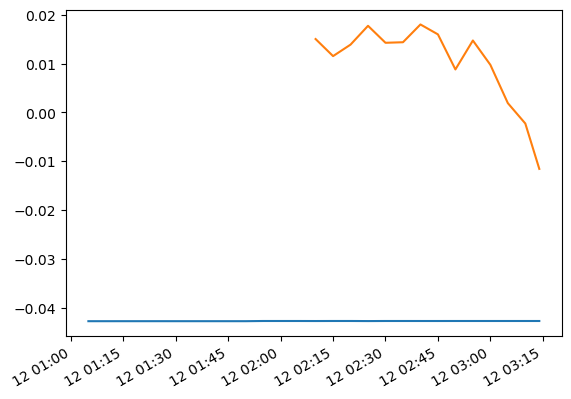

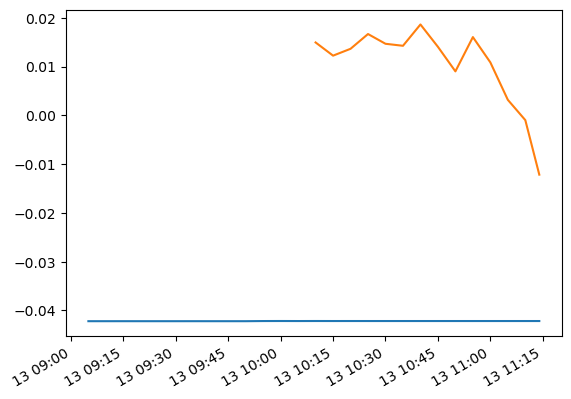

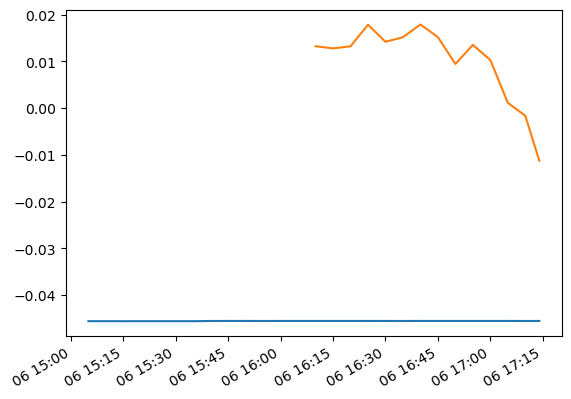

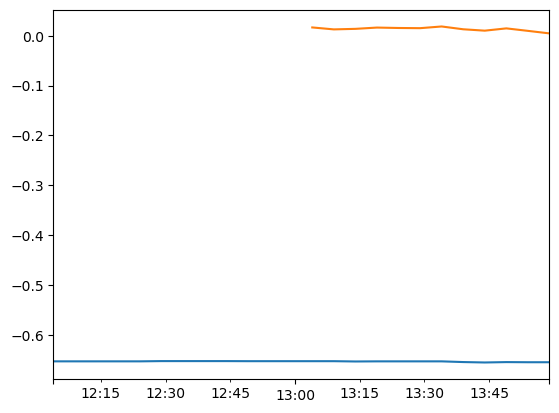

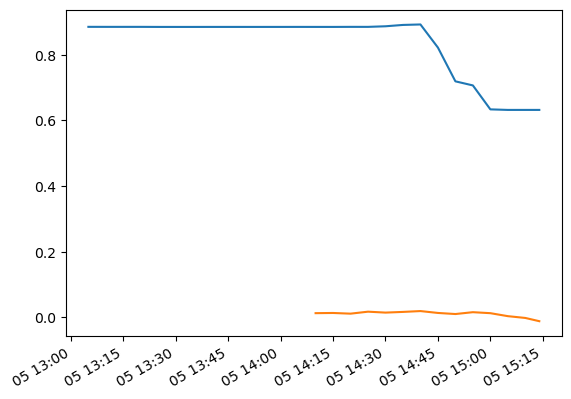

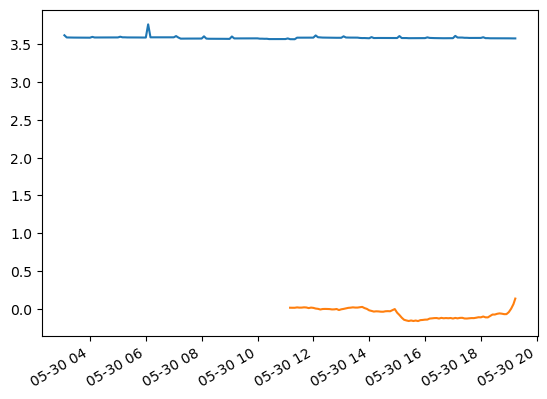

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             64.82906174659729
[TEST BENCH] Average mse over the test set is        1.133406164148193
[TEST BENCH] Average precision over the test set is  0.7416135920572863
[TEST BENCH] Average recall over the test set is     0.419682345754427
[TEST BENCH] Average F1 over the test set is         0.5299282437193087
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data

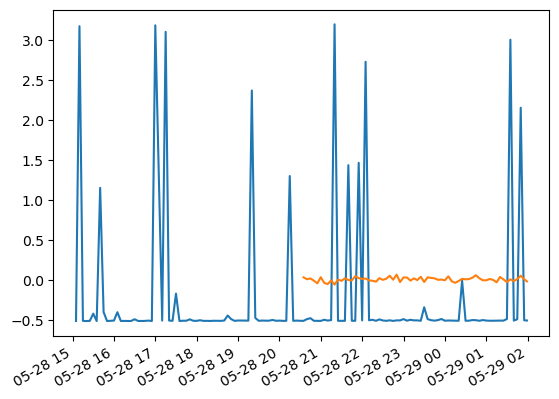

[LSTM] MSE of this prediction is: 0.7681062180690653
[LSTM] ************************ Average loss for the batches in the epoch: 1.006511964578275
[LSTM] Epoch 2 / 20. Last epoch time was 162.1127119064331
[LSTM] Plotting prediction for some random sample in the test set.


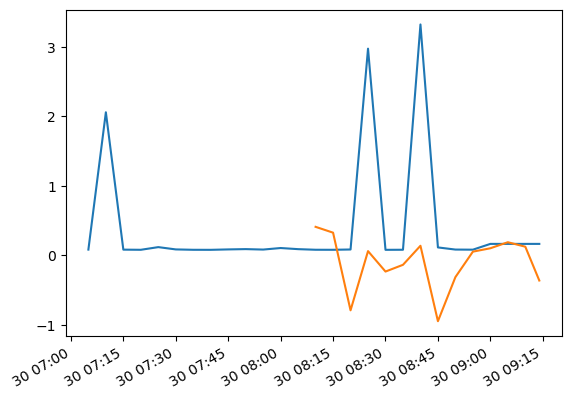

[LSTM] MSE of this prediction is: 1.5200130351185053
[LSTM] ************************ Average loss for the batches in the epoch: 1.0060865090938536
[LSTM] Epoch 3 / 20. Last epoch time was 159.40458273887634
[LSTM] Plotting prediction for some random sample in the test set.


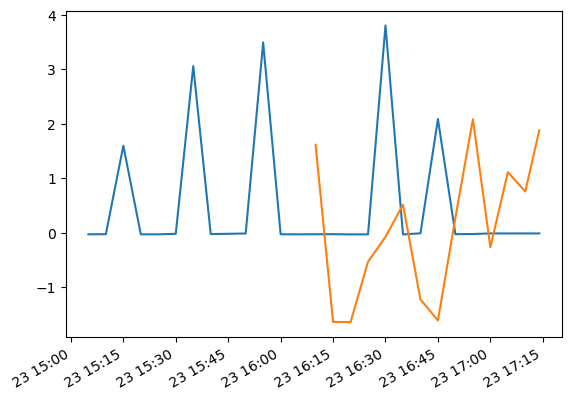

[LSTM] MSE of this prediction is: 3.484595670650994
[LSTM] ************************ Average loss for the batches in the epoch: 1.0059252913346597
[LSTM] Epoch 4 / 20. Last epoch time was 160.60724472999573
[LSTM] Plotting prediction for some random sample in the test set.


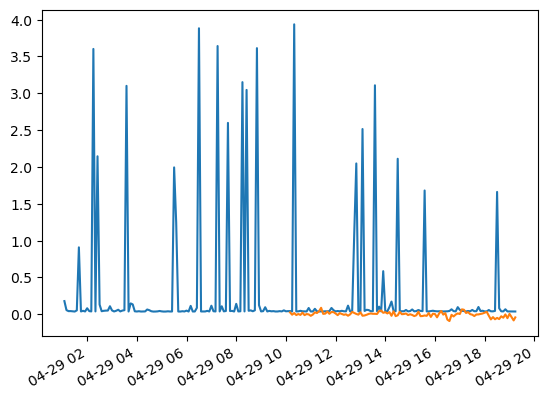

[LSTM] MSE of this prediction is: 0.4345279207062452
[LSTM] ************************ Average loss for the batches in the epoch: 1.0058030443207129
[LSTM] Epoch 5 / 20. Last epoch time was 160.7090494632721
[LSTM] Plotting prediction for some random sample in the test set.


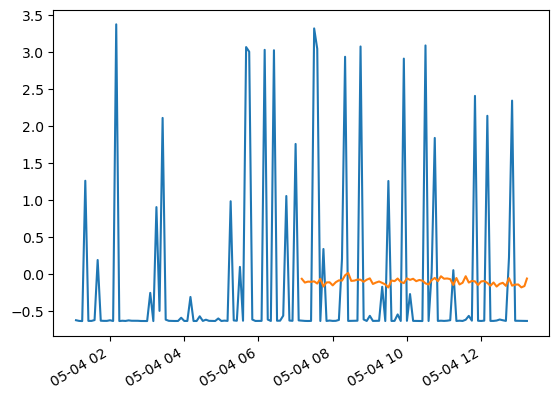

[LSTM] MSE of this prediction is: 1.3406288167523275
[LSTM] ************************ Average loss for the batches in the epoch: 1.004321659209294
[LSTM] Epoch 6 / 20. Last epoch time was 163.52797746658325
[LSTM] Plotting prediction for some random sample in the test set.


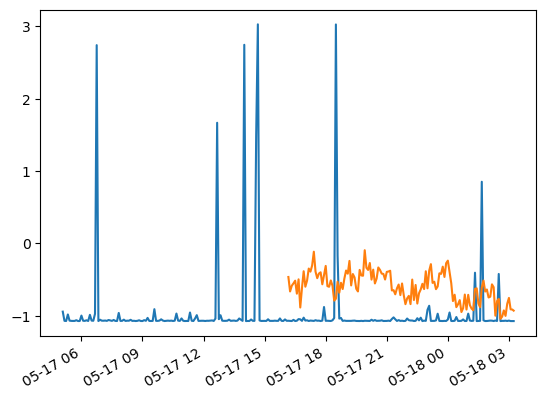

[LSTM] MSE of this prediction is: 0.37729447838020286
[LSTM] ************************ Average loss for the batches in the epoch: 1.0021661217431075
[LSTM] Epoch 7 / 20. Last epoch time was 161.45185947418213
[LSTM] Plotting prediction for some random sample in the test set.


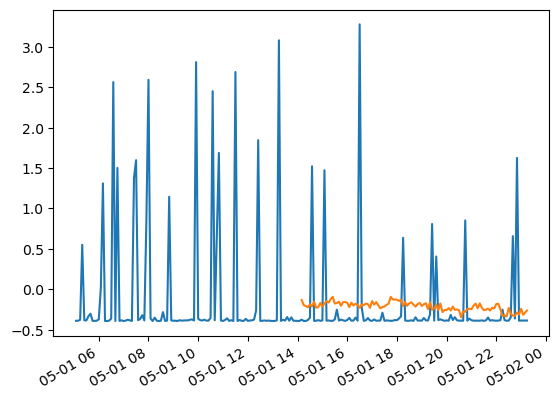

[LSTM] MSE of this prediction is: 0.2664965472574111
[LSTM] ************************ Average loss for the batches in the epoch: 0.9585496004236174
[LSTM] Epoch 8 / 20. Last epoch time was 160.56219625473022
[LSTM] Plotting prediction for some random sample in the test set.


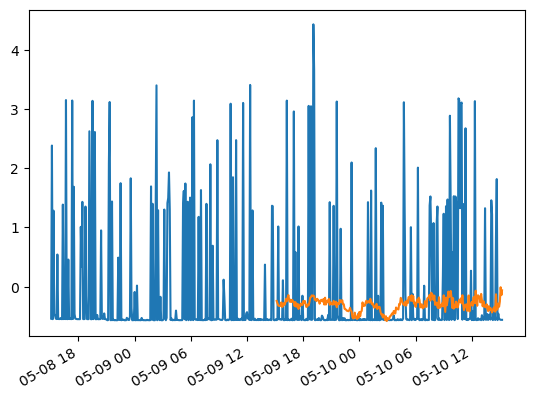

[LSTM] MSE of this prediction is: 1.0278904909672761
[LSTM] ************************ Average loss for the batches in the epoch: 0.9045509432433346
[LSTM] Epoch 9 / 20. Last epoch time was 161.42386031150818
[LSTM] Plotting prediction for some random sample in the test set.


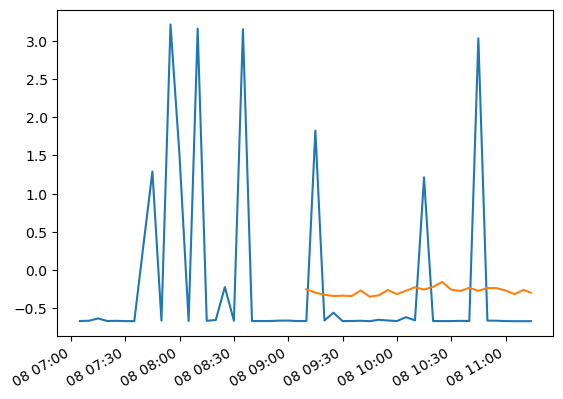

[LSTM] MSE of this prediction is: 0.8067193649296598
[LSTM] ************************ Average loss for the batches in the epoch: 0.8957316776333354
[LSTM] Epoch 10 / 20. Last epoch time was 158.31551003456116
[LSTM] Plotting prediction for some random sample in the test set.


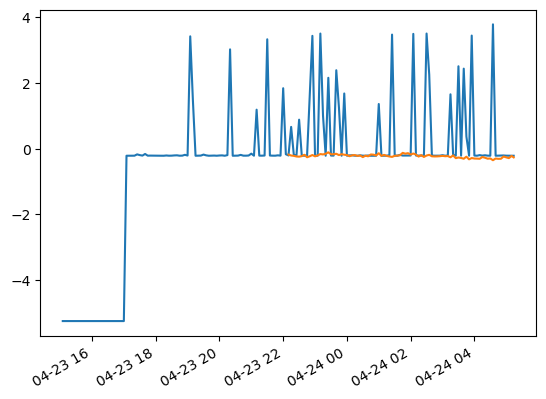

[LSTM] MSE of this prediction is: 1.7528536948318092
[LSTM] ************************ Average loss for the batches in the epoch: 0.8839361187610918
[LSTM] Epoch 11 / 20. Last epoch time was 161.13042569160461
[LSTM] Plotting prediction for some random sample in the test set.


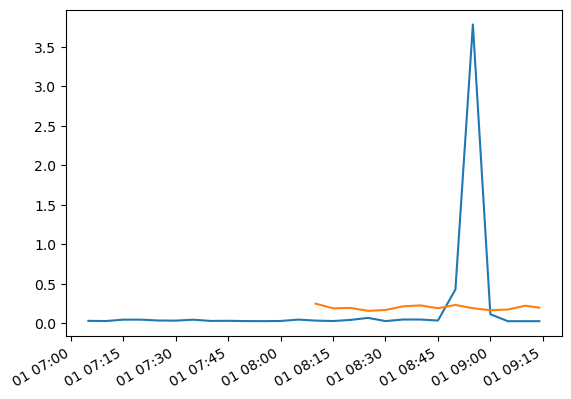

[LSTM] MSE of this prediction is: 0.9440652045032112
[LSTM] ************************ Average loss for the batches in the epoch: 0.880195928796427
[LSTM] Epoch 12 / 20. Last epoch time was 160.98904705047607
[LSTM] Plotting prediction for some random sample in the test set.


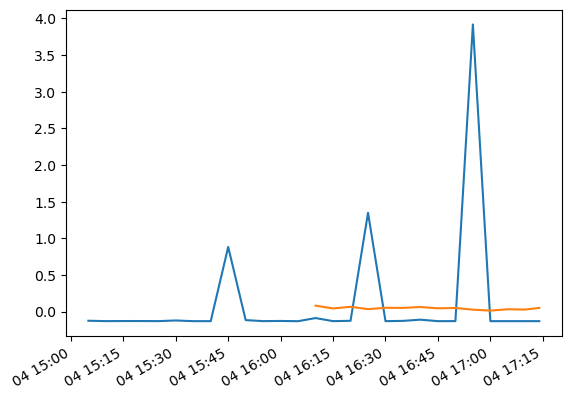

[LSTM] MSE of this prediction is: 1.2305456682909413
[LSTM] ************************ Average loss for the batches in the epoch: 0.9131139955577829
[LSTM] Epoch 13 / 20. Last epoch time was 162.73263025283813
[LSTM] Plotting prediction for some random sample in the test set.


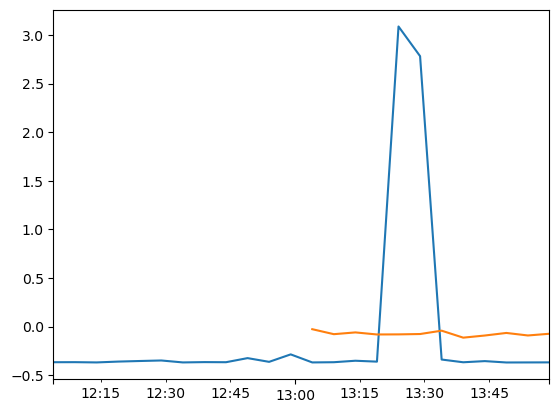

[LSTM] MSE of this prediction is: 1.587694215678792
[LSTM] ************************ Average loss for the batches in the epoch: 0.963025626205436
[LSTM] Epoch 14 / 20. Last epoch time was 161.4206805229187
[LSTM] Plotting prediction for some random sample in the test set.


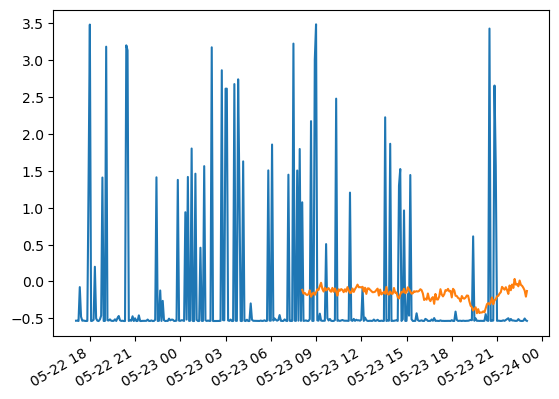

[LSTM] MSE of this prediction is: 0.5961154476097547
[LSTM] ************************ Average loss for the batches in the epoch: 0.9022253724779922
[LSTM] Epoch 15 / 20. Last epoch time was 161.7868537902832
[LSTM] Plotting prediction for some random sample in the test set.


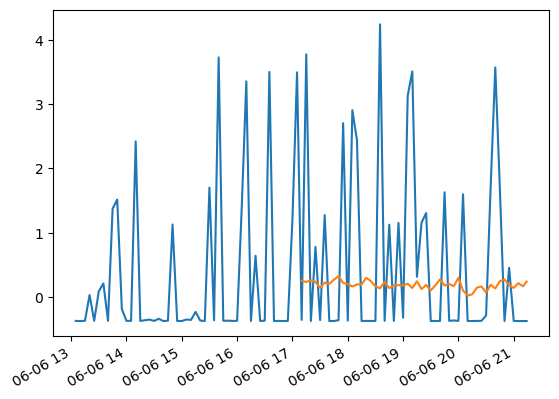

[LSTM] MSE of this prediction is: 2.083765424543207
[LSTM] ************************ Average loss for the batches in the epoch: 0.8837347601336247
[LSTM] Epoch 16 / 20. Last epoch time was 161.489098072052
[LSTM] Plotting prediction for some random sample in the test set.


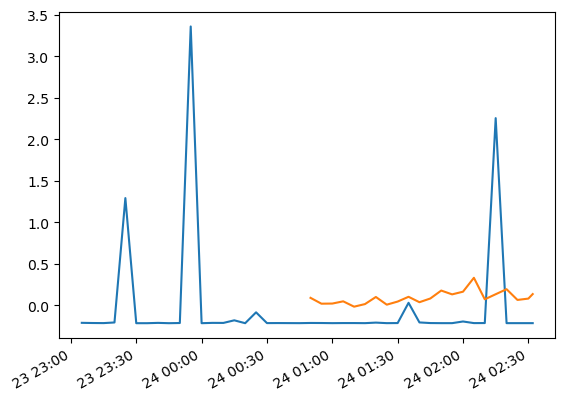

[LSTM] MSE of this prediction is: 0.2937762788697995
[LSTM] ************************ Average loss for the batches in the epoch: 0.8642158833298844
[LSTM] Epoch 17 / 20. Last epoch time was 158.48997592926025
[LSTM] Plotting prediction for some random sample in the test set.


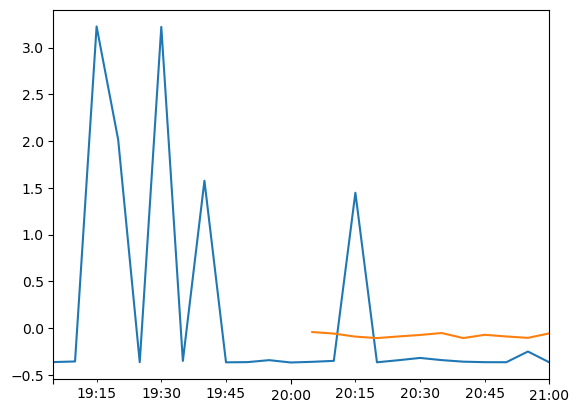

[LSTM] MSE of this prediction is: 0.26473899390200667
[LSTM] ************************ Average loss for the batches in the epoch: 0.8623698645940654
[LSTM] Epoch 18 / 20. Last epoch time was 158.30880856513977
[LSTM] Plotting prediction for some random sample in the test set.


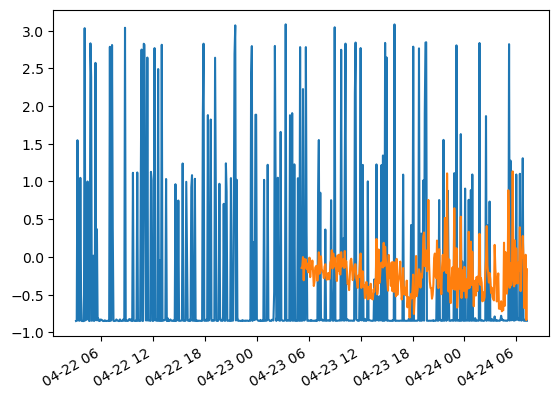

[LSTM] MSE of this prediction is: 0.8636571688597992
[LSTM] ************************ Average loss for the batches in the epoch: 0.8757382094080082
[LSTM] Epoch 19 / 20. Last epoch time was 159.91190242767334
[LSTM] Plotting prediction for some random sample in the test set.


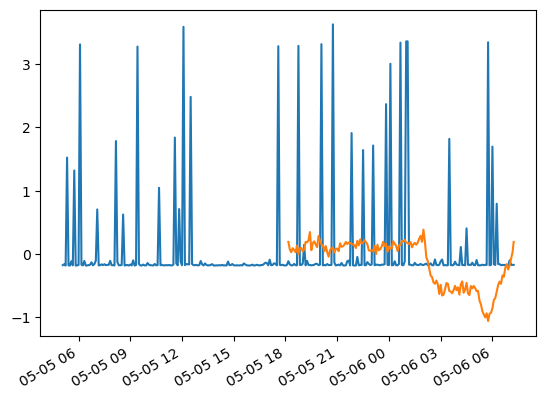

[LSTM] MSE of this prediction is: 0.8736216839904518
[LSTM] ************************ Average loss for the batches in the epoch: 0.8718678211567836
[LSTM] Epoch 20 / 20. Last epoch time was 160.8555006980896
[LSTM] Plotting prediction for some random sample in the test set.


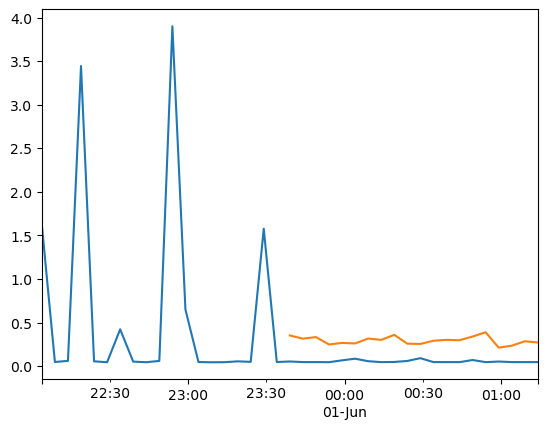

[LSTM] MSE of this prediction is: 0.05984441826382403
[LSTM] ************************ Average loss for the batches in the epoch: 0.8670890788215587
[TEST BENCH] Training took 3222.069216489792 seconds.
[TEST BENCH] Starting testing loop


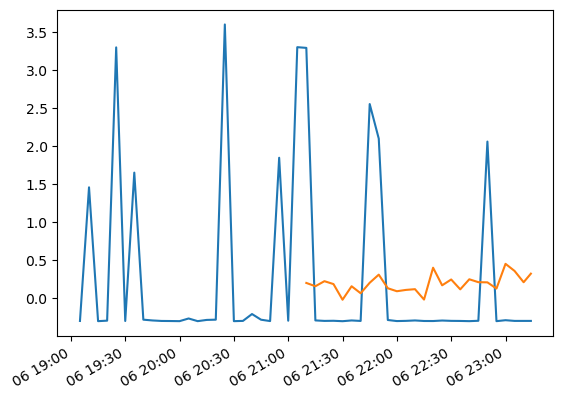

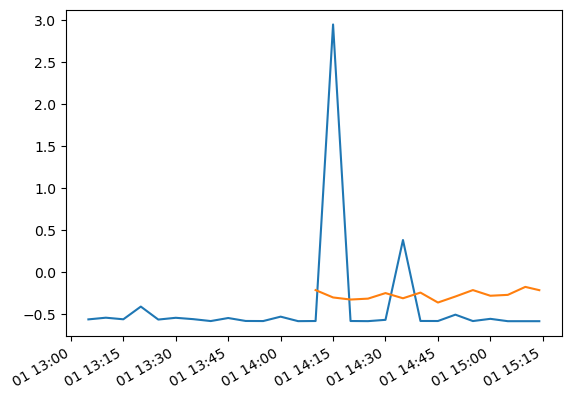

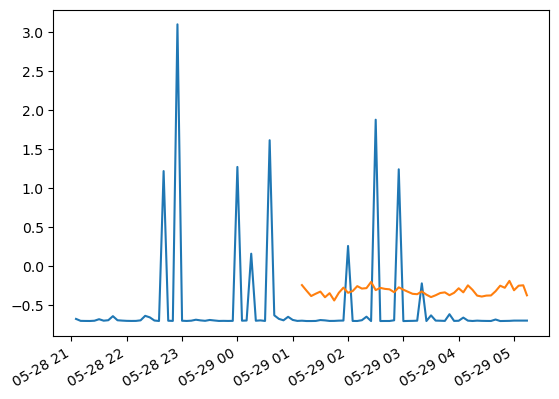

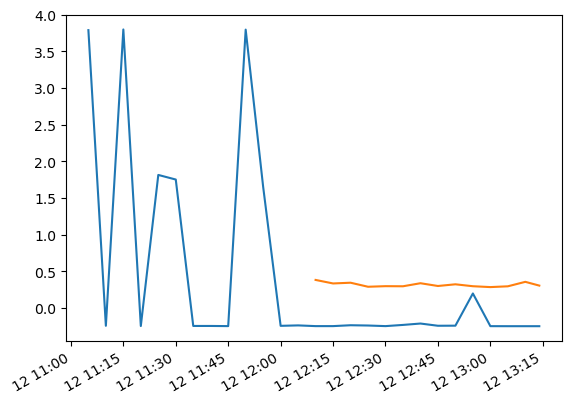

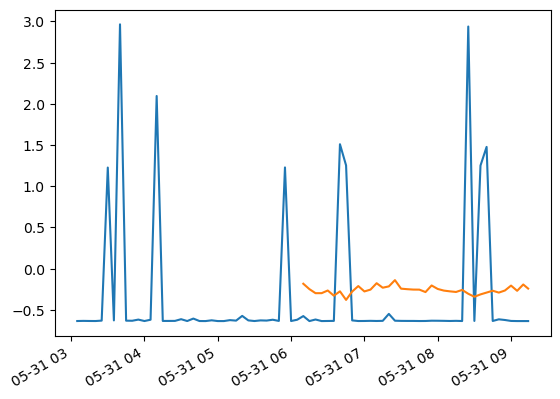

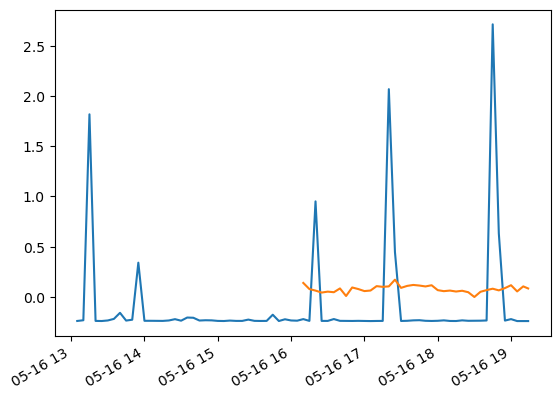

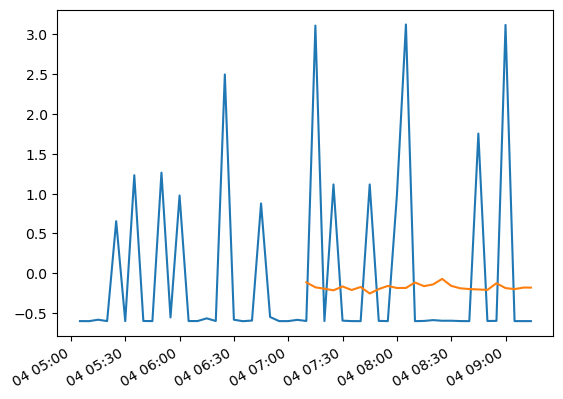

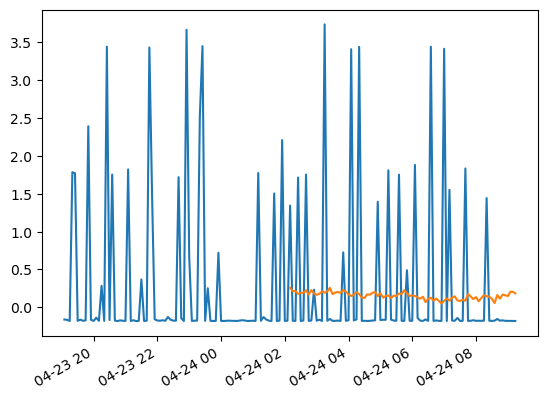

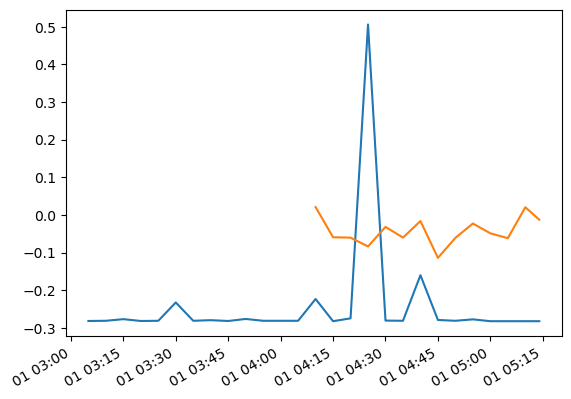

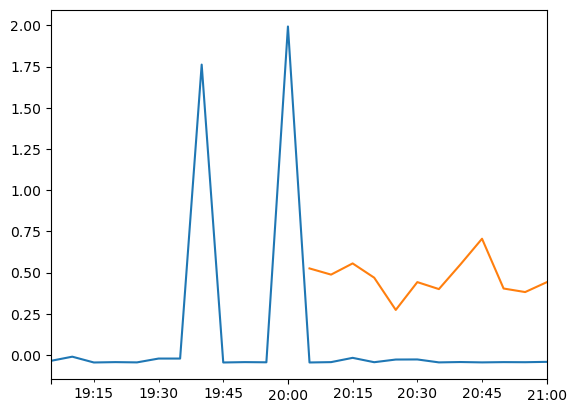

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='nmstate-handler':
[TEST BENCH] Training time in seconds is             3222.069216489792
[TEST BENCH] Average mse over the test set is        0.7453655449837093
[TEST BENCH] Average precision over the test set is  0.5433885897532624
[TEST BENCH] Average recall over the test set is     0.4791548320811094
[TEST BENCH] Average F1 over the test set is         0.5063641749121065
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='nmstate-handler'
[TEST BENCH] testing metric='container_mem', app='coredns'.
[TEST BENCH] Fetching data for metric='container_mem', app='coredns'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling 

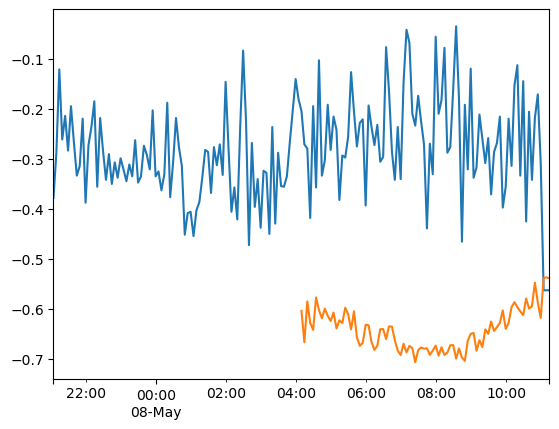

[LSTM] MSE of this prediction is: 0.16309741388158794
[LSTM] ************************ Average loss for the batches in the epoch: 0.6471763513940392
[LSTM] Epoch 2 / 20. Last epoch time was 256.92370438575745
[LSTM] Plotting prediction for some random sample in the test set.


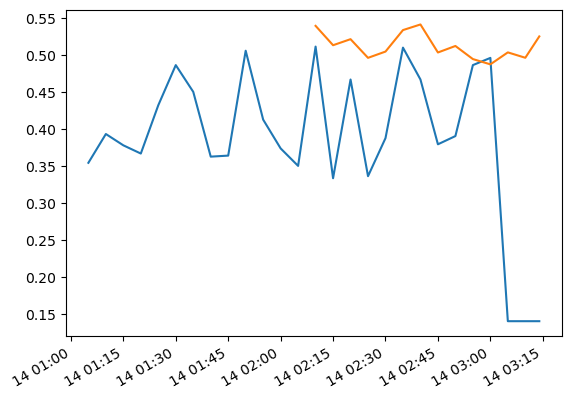

[LSTM] MSE of this prediction is: 0.037055212404148476
[LSTM] ************************ Average loss for the batches in the epoch: 0.3490774310387763
[LSTM] Epoch 3 / 20. Last epoch time was 251.94960570335388
[LSTM] Plotting prediction for some random sample in the test set.


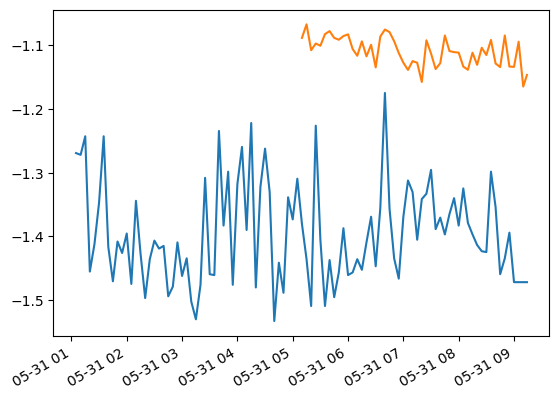

[LSTM] MSE of this prediction is: 0.08807088075190173
[LSTM] ************************ Average loss for the batches in the epoch: 0.4803436395237631
[LSTM] Epoch 4 / 20. Last epoch time was 257.76001811027527


KeyboardInterrupt: 

In [2]:
tb = bench.TestBench(
    class_to_test=lstm.LSTMTester,
#     tests_to_perform=[
#         {"metric": "node_mem", "app": "moc/smaug", "test percentage": 0.2, "sub sample rate": 5,
#          "data length limit": 20},
#     ],
    path_to_data="./data/"
)
tb.run_training_and_tests()